# Chapter 4: Machine Learning



In [ ]:
import pandas
import sklearn
import numpy

print(pandas.__version__)
print(sklearn.__version__)
print(numpy.__version__)

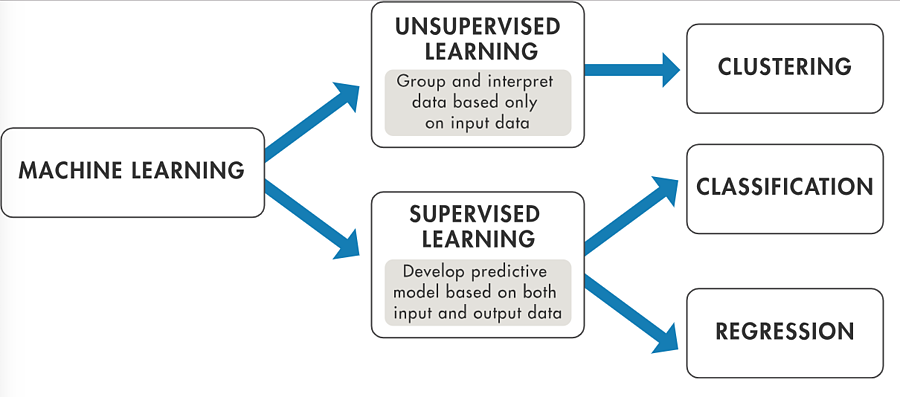

In supervised machine learning we train a model from a "training data", which contains previously seen observations.
Let's say we would like to predict the color of a wine based on the reviews written about it.

The training data (previously seen observations) for this task might contain following "review" - "label" pairs, where the "label" is the color of a wine (the value we want to predict).

```Review 1:``` <br>
Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.

```Label 1:``` <br>
Red

```Review 2:``` <br>
Crisp and on the sweet side, this PG has flavors of honey, lemons, limes, green apples, figs and peppery spices. Nice as a cocktail sipper. Try with Chinese food for something different.

```Label 2:``` <br>
White

...




Using this training data, a given machine learning algorithm can learn to map certain "features" from these reviews to the corresponding "label".
For example if our features are boolean values to indicate if a noun (from all possible nouns) appears in a review that appear in a review, the algorithm might learn that "tannin" is a good predictor for "Red" wine and "lime" is perhaps a good predictor of "White" wine.
In traditional machine learning approaches (not neural networks), features are extracted by humans and can consist of any type of information, which we think might be useful to predict a given "label".

What other features can we extract from wine reviews to predict wine color?

The power of machine learning comes with its ability to map combinations of features to labels that it can learn from a very large data set, that is difficult for a human to process. The following illustration summarizes the steps we need to take to train a machine learning model and to use it to make predictions:




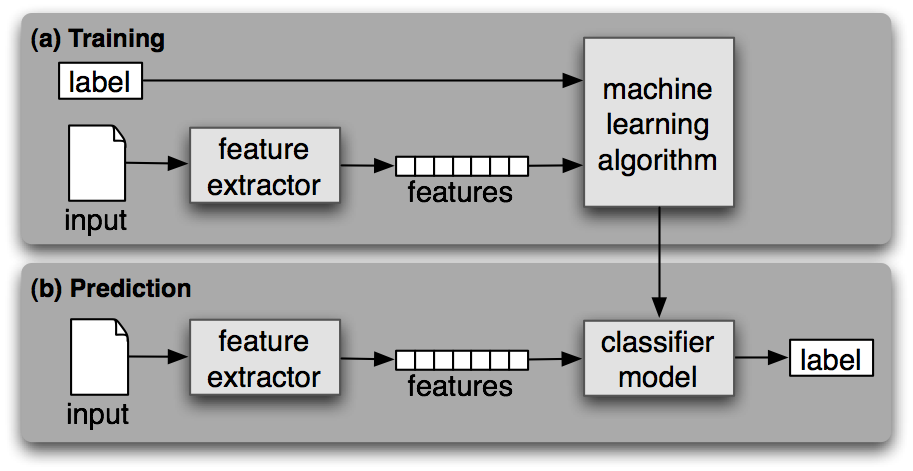

In the remainder of the course, we will be extracting features (i.e. feature engineering) and training machine learnin models for two tasks:
- Predicting wine color from wine reviews (Classification)
- Predicting wine score from wine reviews (Regression)

We will use the following three packages:<br>
__pip install scikit-learn__ (machine learning)<br>
__pip install pandas__ (handle csv files)<br>
__pip install numpy__ (feature vectors) <br>

### Pandas data structures
There are two types of data structures in pandas: __Series__ and __DataFrames__.

__Series__: a pandas Series is a one dimensional data structure (“a one dimensional ndarray”) that can store values — and for every value it holds a unique index, too.

__DataFrame__: a pandas DataFrame is a two (or more) dimensional data structure – basically a table with rows and columns. The columns have names and the rows have indexes.

In [ ]:
import pandas

# Let's load the training data from a csv file
train_set = pandas.read_csv('./train.csv', sep='\t', encoding='utf-8')
train_set



## Classification: Logistic regression

For classification tasks, Logistic regression models the probabability of an event occurring ("Red", "White", "Rosé") depending on the values of the independent variables (features).

Q: What are some indicators (features) of a wine being red? 


We know that z is the weighted sum of the evidence for the class (probability of the class occurring).<br>


\begin{align}
z = c_0+c_1*𝑥_1+c_2*𝑥_2+...+c_𝑛*𝑥_𝑛
\end{align}

The larger the weight the greater impact the given feature has on the final decision:<br>
- large positive values indicate a positive impact (for the event to occur)
- large negative values indicate a negative impact (for the event not to occur)

Q: What kind of a coefficient do you expect to see for "Tannin" for the labels "Red" and "White"?


Z value is between -∞ and +∞. 
Therefore we apply the sigmoid (or logistic function) to this value to obtain prob. values between 0 and 1.
The final probability scores let the model predict the label. If the prob of "Red" is higher than all other labels, the prediction will be "Red".



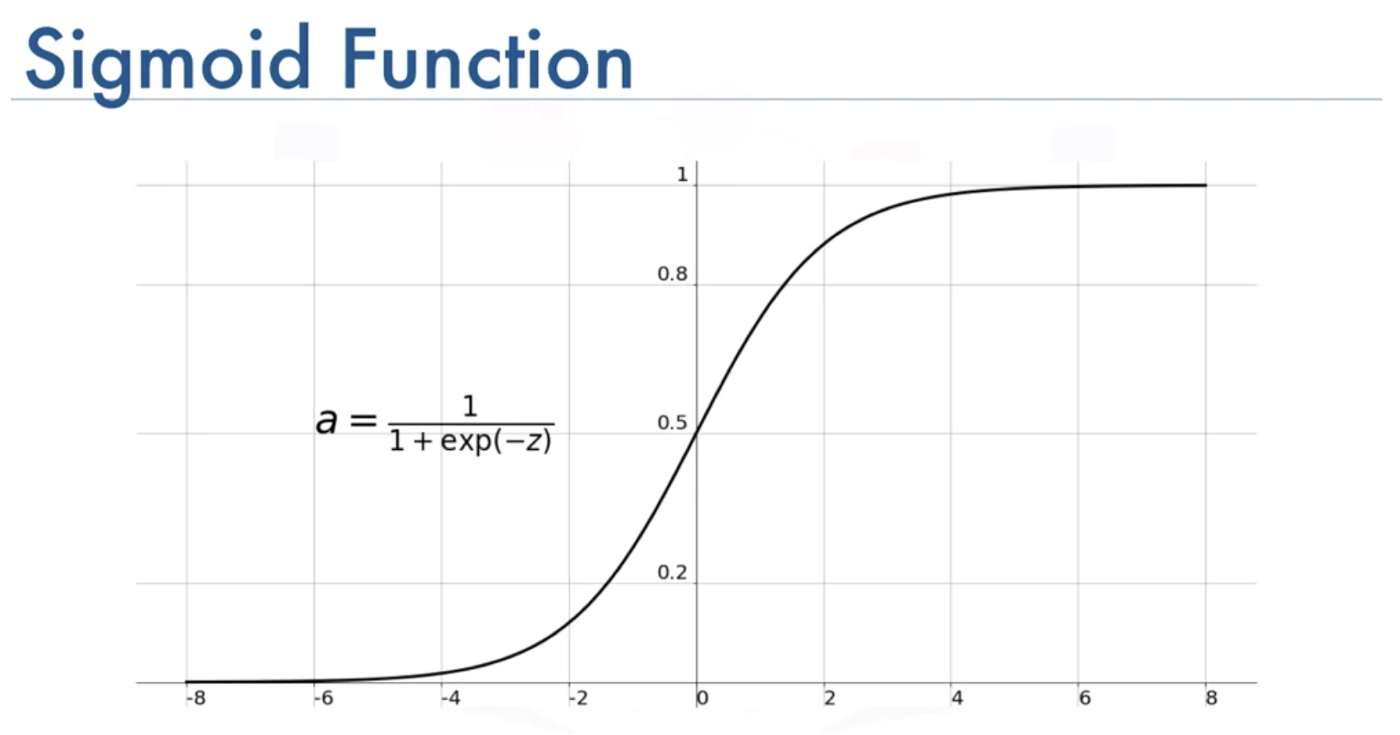

Let's try to build a simple logistic regression model to predict the wine color from the given reviews!

In [ ]:
# To build a machine learning model, we are only interested in the "Review" and "Color" information for now
train_subset = train_set[["Review", "Color"]]
train_subset

In [ ]:
# Let's extract only these two columns from the data 
train_reviews = train_set['Review'].to_list()
train_colors = train_set['Color'].to_list()
print(train_reviews[:5])
print(train_colors[:5])



In [ ]:

# What are the unique labels
print(???)

# Let's also print the count of each color label in this data set
white_count = train_colors.count("White")
red_count = train_colors.count("Red")
rose_count = ???
unk_count = ???
print(white_count, red_count, rose_count, unk_count)

When processing large volumes of text, the statistical models are usually more efficient if you let them work on batches of texts. spaCy’s __nlp.pipe()__ method takes an iterable of texts and yields processed Doc objects. 

Why do we process the data first with Spacy?

In [ ]:
import spacy
import sys

# Load the small English model in SpaCy
nlp = ???

# Process the list of reviews
# Use nlp.pipe to process the list of reviews (instead of looping over the list and processing them one by one)
train_doc_reviews = ???




In [ ]:
# Let's print the text of the first 5 nlp objects (reviews)
for review in list(train_doc_reviews)[:5]: 
    ???

Now it's time to find useful features in this data set that can help us to predict wine color.
We will start with a limited list of 10 features (10 terms in this example).
We will then represent each review with the 10 words and indicate if the words in our list exist in a given review or not.
We can do this by first creating a zero vector of length 10 and change the value of each feature to 1 if the corresponding word exists in the given review.

Let's start!<br>
Pick 10 terms from the following candidates, which you think might be good predictors of wine color
(we will not use the colors we are predicting as terms, such as "white", "red" or "rose").
Use lemmas of words to make your list.
 


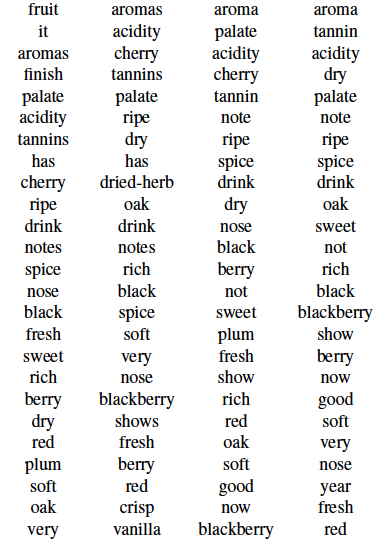

In [ ]:
import numpy

# assign the list of terms to a variable
terms = ["tannin", "cherry", "oak", "fresh", "vanilla", "rich", "blackberry", "very", "dry", "spice"]

#Review 1:
#Raspberry and ---cherry--- aromas mix with more mature notes of fall leaves and lead into some earthy complexity 
#on the somewhat thin palate. Velvety ---tannins--- and moderate acidity make for easy drinking. Notes of woods and 
#mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.

#terms in this review: tannin, cherry
#features_review1 = [1, 1, 0, 0, ..., 0]

# Let's create zero vectors of length 10 for each review in our training set
# numpy.zeros(X, Y) let's us do this easily
# X = no. of rows, Y = no. of columns
# list of reviews = 10.000 reviews (rows), 1 column
# list of features = 10.000 rews, 10 columns (features)
train_features = numpy.zeros((len(train_reviews), len(terms))) # tuple of (x, y) values

# Print the shape of this 2d array
print(train_features.shape)


In [ ]:
import sys
import spacy


# Load the small English model in SpaCy
nlp = spacy.load("en_core_web_sm")

# Process the list of reviews
# Use nlp.pipe to process the list of reviews (instead of looping over the list and processing them one by one)
train_doc_reviews = nlp.pipe(train_reviews)
# Let's check first how these features look like
# We will print the first review which contains one of the terms we picked, as well as the "label" for the wine

for review, label in zip(train_doc_reviews, train_colors):
    print(review)
    # We will use the lemma of each token
    lemma_list = [token.lemma_ for token in review] 
    print(lemma_list)
    #print(tokens_list)
    for term in terms:
        if term in lemma_list:
            print(term)
           
    print("Label is " + label)
    sys.exit()


Now we will modify our feature vectors (zero-vectors initially).
We will do a simple modification: If a given feature (chosen word in our list) exists in a review, we will mark its value as 1 (instead of 0).

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

#Recreate zero feature vectors
train_features = numpy.zeros((len(train_reviews), len(terms)))

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)


# loop over each review, label and feature vector at the same time (zip)
for review, label, f in zip(train_doc_reviews, train_colors, train_features):
    tokens_list = [token.lemma_ for token in review]
    #print(tokens_list)
    for term in terms:
        print(term)
        # if a given term is in the review
        if ???:
            # we will get its ID from the feature vector first
            term_id = ???
            print(term_id)
            # and change the corresponding value to 1 (for this term)
            ???
            print(f)
    print()
    print(review)
    print(label)
    sys.exit()

Now repeat the same process to assign values for all reviews (by reusing the same code without sys.exit()

In [ ]:
# Add your code here



### DIY
Let's modify the the codes above so that:
- We use a new term list for the same task: terms2 = ["fall", "sweet", "plum"]
- Create a set of zero-vectors for the same training data set with the correct size
- Process the reviews with small English model in Spacy
- Transform reviews to feature sets: Loop over each review/zero-vector pair and update the zero-vector indexes (to 1) if any of the 3 terms are found in the review.
- Print the first 3 reviews, corresponding feature sets for these reviews and the correct label (color) 

The output of this code should be the following: <br>


```
Raspberry and cherry aromas mix with more mature notes of fall leaves and lead into some earthy complexity on the somewhat thin palate. Velvety tannins and moderate acidity make for easy drinking. Notes of woods and mushroom on the finish suggest that this wine will not have much going forit by the end of 2009.
[1. 0. 0.]
Red

This Navarran Garnacha is more interesting, offering lemony, floral aromas that are red in nature and not very stout. The palate sizzles with racy acidity, while the flavor profile is pure and tangy, with cranberry and red plum notes. A zesty style of Grenache.
[0. 0. 1.]
Red

A fine complement to the Forgeron Late Harvest Sémillon, this is equally sweet (9.5%) but fortified to just under 18% alcohol. It’s reminiscent of Benedictine & Brandy – orange liqueur with some alcohol power. Nice focus and balance.<br>
[0. 1. 0.]
unk

```


In [ ]:
import numpy

# assign the list of terms to a variable
???

# Let's create zero vectors of length 10 for each review in our training set
# numpy.zeros(X, Y) let's us do this easily
# X = no. of rows, Y = no. of columns
three_terms_features = ???
print(three_terms_features.shape)

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

# loop over each review, label and feature vector at the same time (zip)
#print(zip(train_doc_reviews, train_features2, train_colors))
for review, f, c in list(zip(???))[:3]:
    tokens_list = ???
    #print(tokens_list)
    for term in three_terms:
        #If term is found in review, update the feature vector accordingly
        if term in tokens_list:
            ???
    print(review)
    print(f)
    print(c)

## Training Logistic Regression Model with *Sklearn*
Now let's import sklearn (and logistic regression) to train the model.<br>
We need two data sets to train the model: the feature vector per review and the corresponding label (wine color)



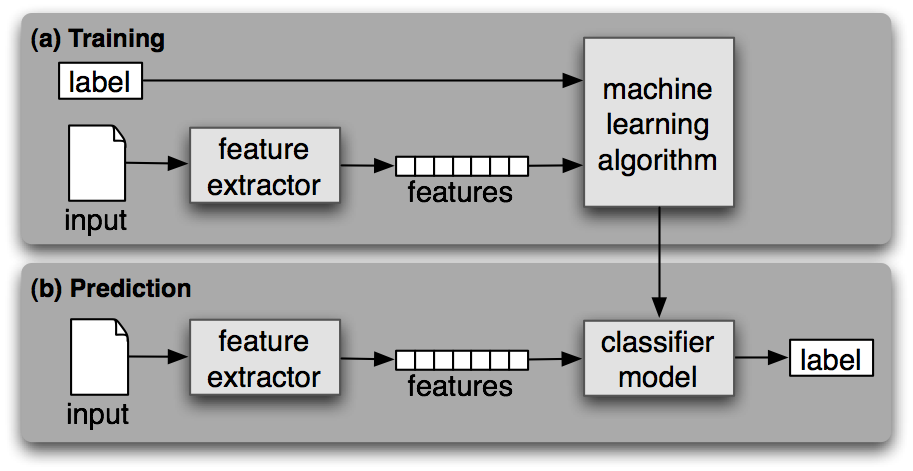

In [ ]:
#In sklearn, all machine learning models are implemented as Python classes
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model from LogisticRegression class
# all parameters not specified are set to their defaults
lr = ???

# Train the model on the data, storing the information learned from the dat`a
# Model is learning the relationship between digits (x_train) and labels (y_train)
lr.fit(???)

# Let's see what are the possible labels to predict (and in which order they are stored)
print(???)

# We can get additional information about all the parameters used with LogReg model
print(???)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Let's save (and load) our model so that we don't have to train it again!


In [ ]:
import pickle
print(pickle.format_version)


In [ ]:
import pickle


# Save to file in the current working directory
pkl_filename = "lr_model1.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)

# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
# Let's see what are the possible labels to predict (and in which order they are stored)
print(pickle_model.classes_)

# We can get additional information about all the parameters used with LogReg model
print(pickle_model.get_params())

## Predicting Labels Using the Model
Our model is ready!
Now it's time to make predictions. To be able to use our model on the test set, we need to process it the same way we did with the training set:

1. Make a list of reviews and a list of labels of the test set
2. Create zero-vectors to represent our features
3. Modify these vectors by checking if our terms appear in each review

In [ ]:
# Step 1
import pandas
test_set = pandas.read_csv('./test.csv', sep='\t', encoding='utf-8')
test_set


# Let's extract only the relevant columns, and put them in lists
test_reviews = test_set['Review'].to_list()
test_colors = test_set['Color'].to_list()

# Print the first five item in each list to make sure it looks ok
print(test_reviews[:5])
print(test_colors[:5])

# Check the length of the items in the test_set
print(len(test_reviews))


In [ ]:
# Step 2
# Create zero vectors (of length 10) for each review (of len(test_reviews))
test_features = numpy.zeros(???)
print(test_features.shape)



### DIY
Let's update the zero vectors 
- Loop over each review and (zero) feature vector for the test set
- get a list of token lemmas for each review
- Loop over term list and if a term is in list of lemmas, update the feature vector value to 1 for this term index

In [ ]:
# Step 3
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
test_doc_reviews = nlp.pipe(test_reviews)

# Update the feature vectors by checkin if the terms exist per review
???

Ok our test set is also processed!
Now we can make predictions using our trained model.



In [ ]:
# We can predict a label for individual items in the test set
# Let's define a function to get an overview of our data sets

def print_item(i):
  # Print the review for index i
  ???
  # Print the features vector for index i
  ???
  # Print the list of terms that correspond to the features
  ???
  # Print the correct label for index i 
  ???

print_item(3)
print_item(12)

In [ ]:
# Print the output of the model we trained
print()
print("Prediction:")
# Predict the label
print(lr.predict([test_features[3]]))
#lr.predict(test_features)
# Predict the label but also tell us the probabilities for predicting each possible label
print(lr.predict_proba([test_features[3]]))



Let's put all this code in a function which takes only an ID as input, which will than be used to print all the necessary information and predict the test item with this ID.

In [ ]:
def predict(i):
    # Print the review of the index
    print(test_reviews[i])
    # print the features of the index
    print(test_features[i])
    # print all terms
    print(terms)
    # print the correct label of the index
    print(test_colors[i])

    print()
    print("Prediction:")
    # print the prediction for the features of this index
    ???
    # print the probabilities for each label predictions
    ???
    print()

In [ ]:

predict(3)
predict(12)

## Analysing the model
So far so good!
We are able to make predictions with the model we trained.
What about the model itself? How does each feature affect the result?
We can see the importance of each feature by looking at their weights (i.e. coefficients)

\begin{align}
z = c_0+c_1*𝑥_1+c_2*𝑥_2+...+c_𝑛*𝑥_𝑛
\end{align}

In the formula above, each feature is denoted as $X_i$ and each weight (or coefficient) with $c_i$.

In [ ]:
for label, coefs in zip(lr.classes_, lr.coef_):
    print(label)
    for t, c in zip(terms, coefs):
        print(t, c)
    print()



How can we interpret the coefficients?
The coefficients are "learned" by the model per label. The lager positive values of a coefficient indicates that the existence of the corresponding feature (in other words when it is a 1) increases the probability of that label occurring more.

As an example, the terms "blackberry" and "tannin" have the largest values for predicting the label "Red". The existence of these words in a given review therefore increases the probability of the prediction for "Red" more than other terms. In other words, these terms are the most important terms for detecting "Red" (compared to the other terms I have in my list).

Negative values on the other hand reduce the probability for predicting a label. 
As an example, "Cherry" and "Tannin" have the largest negative values for predicting the label "White". It does not mean that these features are not important. On the contrary, they are very important as if one of these terms appear in a review, the prediction will more likely not to be "White".

The values that are near to one (positive or negative) are the least important (informative) features for predicting a given label.

In the above formula, there is another value $c_0$. This value is called the __intercept__ (or bias).
The intercept is the expected mean value for a given label when all the weights are 0. In other words, we get an intercept value per label, which refers to the expected outcome (high positive values indicate more likely outcomes) when the values of all the features are 0.
The interpretation of the intercept values are the same as other coefficients. 
If all features are zero, the intercept indicates the most likely outcome. The largest positive intercept value will be the "bias" towards that label.

We can also display the intercept for each label as follows:


In [ ]:
for label, coefs, intercept in zip(lr.classes_, lr.coef_, lr.intercept_):
    print(label)
    for t, c in zip(terms, coefs):
        print(t, c)
    print("INTERCEPT:", intercept)
    print()

#How can we interpret the coefficients and the intercept?


### DIY: Training pipeline from scratch 
CELL 1:
- Open train.csv with pandas and assign reviews and color labels to two lists

CELL 2:
- Create a list of terms: ["fall", "sweet", "plum"]
- Create zero feature vectors for the training set

CELL 3:
- Update zero feature vectors by processing the training set

### The remaining steps need to be filled


CELL 4:
- Use these features (3 terms) to train a logistic regression model
- Print the coefficients and the intercept for each term, per label
- Make sure to use a new variable for the new logistic regression model

CELL 5: 
- Open test.csv with pandas and assign reviews and colors to two lists
- Create zero feature vectors for the test set
- Use a new variable name for these features
        
CELL 6:
- Process the test set and update feature vectors

CELL 7:
- Define a function predict2, which takes a review index as input and prints:
    - the review
    - the features
    - the terms
    - the correct label
    - the prediction (using the trained model)
    - the probability of each class being predicted (using the trained model)

CELL 8
- Using the function predict2, predict the labels for review 0 and review 10




In [ ]:
# CELL 1
import pandas

# Let's load the training data from a csv file
train_set = pandas.read_csv('./train.csv', sep='\t', encoding='utf-8')
train_set

# Let's extract only these two columns from the data 
train_reviews = train_set['Review'].to_list()
train_colors = train_set['Color'].to_list()

In [ ]:
# CELL 2
import numpy

# assign the list of terms to a variable
terms2 = ["fall", "sweet", "plum"]

# Let's create zero vectors of length 10 for each review in our training set
# numpy.zeros(X, Y) let's us do this easily
# X = no. of rows, Y = no. of columns
train_features2 = numpy.zeros((len(train_reviews), len(terms2)))
print(train_features2.shape)

In [ ]:
# CELL 3
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)


# loop over each review, label and feature vector at the same time (zip)
for review, f, c in zip(train_doc_reviews, train_features2, train_colors):
    tokens_list = [token.lemma_ for token in review]
    #print(tokens_list)
    for term in terms2:
        if term in tokens_list:
            term_id = terms2.index(term)
            f[term_id] = 1
    

In [ ]:
# CELL 4
# Add your code here


In [ ]:
# CELL 5
# Add your code here


In [ ]:
# CELL 6
# Add your code here

            


In [ ]:
# CELL 7
# Add your code here



In [ ]:
# CELL 8
# Add your code here


## Extending the feature set ###

Until now, we used 10 features (terms) to predict the color of a given wine, based on its review.
We can of course use more features, which is also the power of machine learning systems. 

In the following exercises, we will use all nouns in the training set as our term (feature) list.
Instead of being limited to 10 terms, we can now work with a larger vocabulary.
The advantage of this method is that there might be other terms (features), which might be useful to make the correct predictions.

Let's start by collecting all the nouns from the reviews in the training set.<br>



In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

list_noun = []

for review in train_doc_reviews:
    for token in review:
        # If the token is a noun, we would like to add this to list_noun
        if ???
            list_noun.append(???)

# We can also count the number of unique nouns to have an idea how large our feature vectors will be
print(len(list_noun))
print(list_noun)


While this is a good start, we actually collected all nouns in the reviews, with repetition.
We actually need the unique list of nouns, as we are going to make a feature vector per review to indicate that if a noun exists in the review or not.

Another way of reducing the vector size is only to consider the lemmas of each word (so we don't need to consider all morphological variants of the same lemma).

Let's do that!

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

list_noun_lemma = []

for review in train_doc_reviews:
    for token in review:
        if ???
            # In this case, we will add the lemma of the noun to our list and not the full word
            list_noun_lemma.append(???)
            

# We are only interested in the list of unique nouns
list_noun_lemma_unique = ???

# Let's print and see how many unique nouns we have
print(len(list_noun_lemma_unique))
print(list_noun_lemma_unique)

This looks much better as we have now a much smaller vector size!
Now let's create zero-vectors for our features, which we will modify per review.

In [ ]:
import numpy

# columns, rows
train_features_nouns = numpy.zeros(???)
print(train_features_nouns.shape)


# Repeat for the test set
test_features_nouns = numpy.zeros(???)
print(test_features_nouns.shape)



Before modifying the feature vectors, let's check if everything looks ok one last time.


In [ ]:

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_nouns):
    tokens_list = ???
    # For each noun in our noun list
    for noun in ???:
        # check if the noun exsist in this review
        if noun in ???:
            # if yes, print the noun, the noun id (taken from the feature vector) and the review itself
            print(noun)
            noun_id = ???
            print(noun_id)
            print(review)
            sys.exit()
            

This seems ok.
Let's see now if we can modify the feature-vectors correctly.

In [ ]:

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_nouns):
    tokens_list = [token.lemma_ for token in review]
    for noun in list_noun_lemma_unique:
        if noun in tokens_list:
            print(noun)
            noun_id = ???
            print(noun_id)
            # Update the zero vector for this noun_id
            ???
        # Let's print the vector once it has been modified to have a look
        if 1 in vector:
            print(vector.tolist())
            sys.exit()

Now let's run the whole process on the training and test sets and generate our feature vectors.


In [ ]:

nlp = spacy.load('en_core_web_sm')

# Process a text
train_doc_reviews = nlp.pipe(train_reviews)

for review, vector in zip(train_doc_reviews, train_features_nouns):
    tokens_list = [token.lemma_ for token in review]
    for noun in list_noun_lemma_unique:
        if noun in tokens_list:
            noun_id = list_noun_lemma_unique.index(noun)
            # Update the value of the corresponding noun to 1
            ???

### DIY
Can you convert this process to a function so that we can use it for generating the feature-vectors for the test set (or for any input data set consisting of reviews and features)?

In [ ]:
def generate_feature_vectors(reviews, features):
    # Add your code here
    # This function does not return anything as it modifies "features" in place.
    
    

Now we can extract feature values for the test set using this function.

In [ ]:
nlp = spacy.load('en_core_web_sm')

# Process test file with spacy
test_doc_reviews = nlp.pipe(test_reviews)

# Update feature vectors for the test set
generate_feature_vectors(???)

Let's check if the features are generated correctly.
The first noun in the first review is "leather".
We can get the index of leather in list_noun_lemma_unique and use this index to check the value of it in the feature-vector for this review.

In [ ]:
print(test_reviews[0])
leather_id = list_noun_lemma_unique.index("leather")
print(leather_id)
print(test_features_nouns[0][leather_id])

Everything seems ok.
Let's train our model now.

In [ ]:
#In sklearn, all machine learning models are implemented as Python classes
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model
# all parameters not specified are set to their defaults
lr_nouns = ???

# Train the model on the data, storing the information learned from the data
# Model is learning the relationship between digits (x_train) and labels (y_train)
lr_nouns.fit(???)

# Let's see what are the possible labels to predict (and in which order they are stored)
print(lr_nouns.???)

# We can get additional information about all the parameters used with LogReg model
print(lr_nouns.???)


In [ ]:
def predict_nouns(index):
    print(test_reviews[index])
    print(test_features_nouns[index])
    print(test_colors[index])

    print()
    print("Predictions:")
    # Print prediction
    print(lr_nouns.predict([test_features_nouns[index]]))
    # print prob of all label predictions
    print(lr_nouns.predict_proba([test_features_nouns[index]]))
    # print all labels
    print(lr_nouns.classes_)
    print()

In [ ]:
predict_nouns(0)
predict_nouns(10)